In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"
config = dict({'scrollZoom': True})

In [26]:
data = pd.read_csv('D:/ML_Data/Daily Visitors/daily-website-visitors.csv')
data.rename(columns = {'Day.Of.Week':'Day of the Week'
                    ,'Page.Loads':'Total Visits'
                    ,'Unique.Visits':'Unique Visits'
                    ,'First.Time.Visits':'First Time Visits'
                    ,'Returning.Visits':'Returning Visits'}, inplace = True)
data = data.replace(',', '', regex=True)

data['Total Visits'] = data['Total Visits'].astype(int)
data['Unique Visits'] = data['Unique Visits'].astype(int)
data['First Time Visits'] = data['First Time Visits'].astype(int)
data['Returning Visits']=data['Returning Visits'].astype(int)

data

,Row,Day,Day of the Week,Date,Total Visits,Unique Visits,First Time Visits,Returning Visits
0,1,Sunday,1,9/14/2014,2146,1582,1430,152
1,2,Monday,2,9/15/2014,3621,2528,2297,231
2,3,Tuesday,3,9/16/2014,3698,2630,2352,278
3,4,Wednesday,4,9/17/2014,3667,2614,2327,287
4,5,Thursday,5,9/18/2014,3316,2366,2130,236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,2221,1696,1373,323
2163,2164,Sunday,1,8/16/2020,2724,2037,1686,351
2164,2165,Monday,2,8/17/2020,3456,2638,2181,457
2165,2166,Tuesday,3,8/18/2020,3581,2683,2184,499


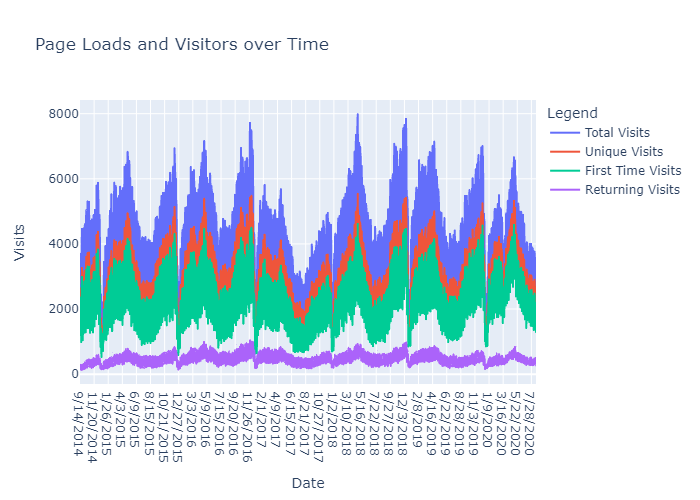

In [29]:
px.line(data,x='Date',y=['Total Visits' ,'Unique Visits' ,'First Time Visits' ,'Returning Visits'],
       labels={'value': 'Visits', 'variable': 'Legend'}
       ,title='Page Loads and Visitors over Time')

In [32]:
sums=data.groupby(['Day'])[['Total Visits', 'Unique Visits', 'First Time Visits' ,'Returning Visits']].sum().sort_values(
    by='Day',ascending=False)

sums

,Total Visits,Unique Visits,First Time Visits,Returning Visits
Day,,,,
Wednesday,1517114,1085624,897602,188022
Tuesday,1536154,1097181,907752,189429
Thursday,1437269,1028214,848921,179293
Sunday,1006564,725794,604198,121596
Saturday,772817,552105,456449,95656
Monday,1502161,1072112,886036,186076
Friday,1149437,817852,668805,149047


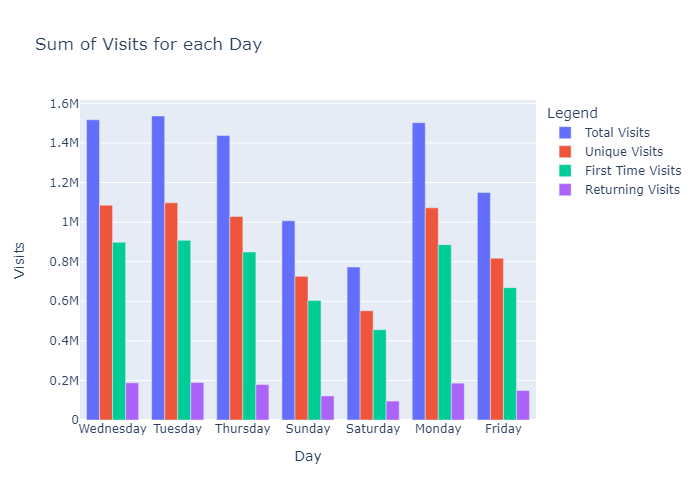

In [35]:
px.bar(sums, barmode='group', title='Sum of Visits for each Day', labels={'value': 'Visits', 'variable': 'Legend'}
)